In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
airlines = pd.read_csv('airlines.csv')
flights = pd.read_csv('flights.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
flights['date'] = pd.to_datetime(flights[['YEAR', 'MONTH', 'DAY']])

In [4]:
remove_column = ['TAIL_NUMBER', 'DIVERTED', 'CANCELLATION_REASON', 'DAY', 'MONTH', 'YEAR', 'LATE_AIRCRAFT_DELAY', 'TAXI_OUT', 'TAXI_IN', 'WHEELS_OFF', 'WHEELS_ON', 'AIR_SYSTEM_DELAY', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'WEATHER_DELAY']
flights.drop(remove_column, axis = 1, inplace = True)
flights.columns

Index(['DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'ARRIVAL_DELAY', 'CANCELLED', 'date'],
      dtype='object')

In [5]:
airline_names = dict(zip(airlines['IATA_CODE'],airlines['AIRLINE']))
flights['airline_name'] = flights['AIRLINE'].apply(lambda x: airline_names[x])
flights.drop('AIRLINE', axis=1, inplace=True)
flights = flights[['DAY_OF_WEEK', 'date', 'airline_name', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CANCELLED']]

In [6]:
days = {7:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
flights['day']=flights['DAY_OF_WEEK'].apply(lambda a:days[a])

In [7]:
flights.drop('DAY_OF_WEEK', axis=1, inplace=True)
flights.columns

Index(['date', 'airline_name', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'CANCELLED', 'day'],
      dtype='object')

In [8]:
flights = flights[['day', 'date', 'airline_name', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CANCELLED']]
flights[:10]

,day,date,airline_name,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,CANCELLED
0,Friday,2015-01-01,Alaska Airlines Inc.,ANC,SEA,-11.0,-22.0,205.0,194.0,169.0,1448,0
1,Friday,2015-01-01,American Airlines Inc.,LAX,PBI,-8.0,-9.0,280.0,279.0,263.0,2330,0
2,Friday,2015-01-01,US Airways Inc.,SFO,CLT,-2.0,5.0,286.0,293.0,266.0,2296,0
3,Friday,2015-01-01,American Airlines Inc.,LAX,MIA,-5.0,-9.0,285.0,281.0,258.0,2342,0
4,Friday,2015-01-01,Alaska Airlines Inc.,SEA,ANC,-1.0,-21.0,235.0,215.0,199.0,1448,0
5,Friday,2015-01-01,Delta Air Lines Inc.,SFO,MSP,-5.0,8.0,217.0,230.0,206.0,1589,0
6,Friday,2015-01-01,Spirit Air Lines,LAS,MSP,-6.0,-17.0,181.0,170.0,154.0,1299,0
7,Friday,2015-01-01,US Airways Inc.,LAX,CLT,14.0,-10.0,273.0,249.0,228.0,2125,0
8,Friday,2015-01-01,American Airlines Inc.,SFO,DFW,-11.0,-13.0,195.0,193.0,173.0,1464,0
9,Friday,2015-01-01,Delta Air Lines Inc.,LAS,ATL,3.0,-15.0,221.0,203.0,186.0,1747,0


In [9]:
flights['over_1min'] = np.where(flights['ARRIVAL_DELAY']>=1, 1, 0)
flights[:10]

,day,date,airline_name,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,CANCELLED,over_1min
0,Friday,2015-01-01,Alaska Airlines Inc.,ANC,SEA,-11.0,-22.0,205.0,194.0,169.0,1448,0,0
1,Friday,2015-01-01,American Airlines Inc.,LAX,PBI,-8.0,-9.0,280.0,279.0,263.0,2330,0,0
2,Friday,2015-01-01,US Airways Inc.,SFO,CLT,-2.0,5.0,286.0,293.0,266.0,2296,0,1
3,Friday,2015-01-01,American Airlines Inc.,LAX,MIA,-5.0,-9.0,285.0,281.0,258.0,2342,0,0
4,Friday,2015-01-01,Alaska Airlines Inc.,SEA,ANC,-1.0,-21.0,235.0,215.0,199.0,1448,0,0
5,Friday,2015-01-01,Delta Air Lines Inc.,SFO,MSP,-5.0,8.0,217.0,230.0,206.0,1589,0,1
6,Friday,2015-01-01,Spirit Air Lines,LAS,MSP,-6.0,-17.0,181.0,170.0,154.0,1299,0,0
7,Friday,2015-01-01,US Airways Inc.,LAX,CLT,14.0,-10.0,273.0,249.0,228.0,2125,0,0
8,Friday,2015-01-01,American Airlines Inc.,SFO,DFW,-11.0,-13.0,195.0,193.0,173.0,1464,0,0
9,Friday,2015-01-01,Delta Air Lines Inc.,LAS,ATL,3.0,-15.0,221.0,203.0,186.0,1747,0,0


In [10]:
rank_flights = pd.DataFrame(flights.groupby('day').count()['SCHEDULED_TIME'])
rank_flights.head()

,SCHEDULED_TIME
day,
Friday,872521
Monday,817761
Saturday,862209
Sunday,700544
Thursday,855897


In [11]:
rank_flights['delayed']=flights.groupby('day').sum()['over_1min']
rank_flights

,SCHEDULED_TIME,delayed
day,,
Friday,872521,335560
Monday,817761,285802
Saturday,862209,326419
Sunday,700544,224677
Thursday,855897,304289
Tuesday,865542,314978
Wednesday,844599,295171


In [12]:
rank_flights['delayed_percentage']=rank_flights['delayed']/rank_flights['SCHEDULED_TIME']*100
rank_flights

,SCHEDULED_TIME,delayed,delayed_percentage
day,,,
Friday,872521,335560,38.458673
Monday,817761,285802,34.949331
Saturday,862209,326419,37.858454
Sunday,700544,224677,32.071790
Thursday,855897,304289,35.552058
Tuesday,865542,314978,36.390839
Wednesday,844599,295171,34.948064


Text(0.5,1,'day of week delayed percentage')

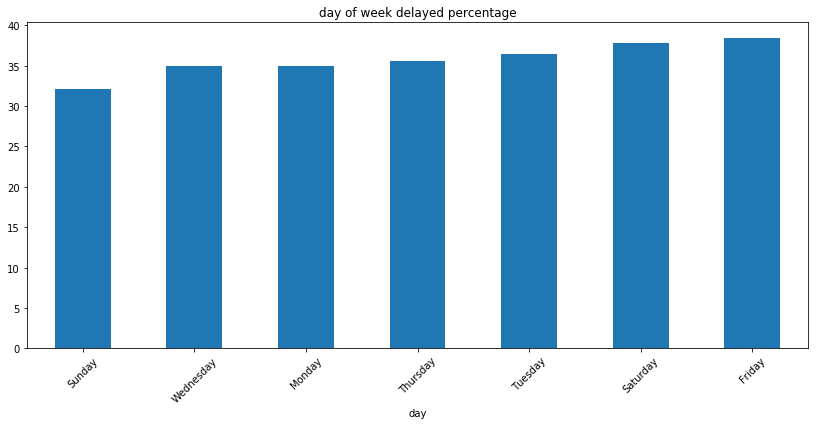

In [13]:
#graph airlines according to delayed percentage
rank_flights.sort_values(['delayed_percentage'],ascending = 1,inplace=True)
rank_flights['delayed_percentage'].plot(kind='bar',figsize=(14,6),rot=45)
plt.title('day of week delayed percentage')

Text(0.5,1,'day of week')

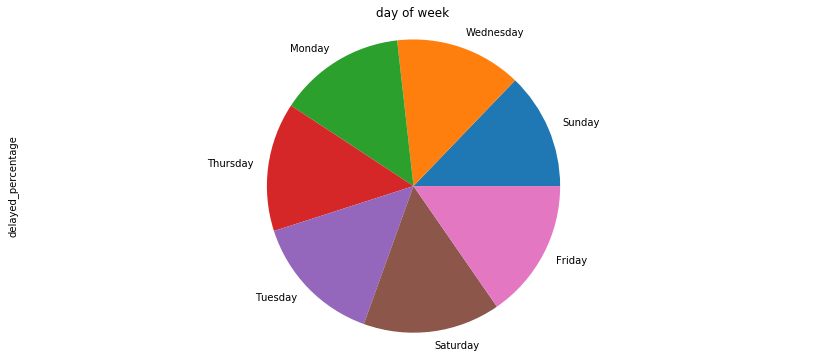

In [49]:
#data = {'-15': [949144],'+15': [390801],'+30': [240931],'+50': [391734],'+1day': [32]}
#labels = rank_flights['delayed_percentage']
#labels
sizes = rank_flights.index
sizes
#explode = (0, 0.2, 0, 0,0)
#fig1, ax1 = plt.subplots()
#ax1.pie(sizes, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90)
rank_flights['delayed_percentage'].plot(kind='pie', labels = rank_flights.index, figsize=(14,6), rot=45)
plt.axis('equal')
plt.title('day of week')